### Notes and References
None yet.




## Setup

### Imports for hosted runtime

In [1]:
%matplotlib inline
#@markdown ###First Cell 
#@markdown *Please paste this cell into any colab notebook for this project.* <br>
#@markdown ***
#@markdown **Contents**: Contents. <br>
#@markdown ***
#@markdown Major Edit History: 
#@markdown - John McCloskey, 6/15: Created as copy of Old Notebook (`Multinomial Regression`).
#@markdown - John McCloskey, 6/15: Change from multinomial based workflow to an assortment of different classifiers
#@markdown - John McCloskey, 6/23: Clean up code. Rename from `Classifiers` to `Grid Searches`.
#@markdown - John McCloskey, 6/23: Rename from  `Grid Searches` to `Grid Searches - Luke`.
#@markdown - Luke Swanson, 6/24: Modified grid search code to map each y key to a different file.

#@markdown ***
#@markdown <br> 
#@markdown Please change `FIELDDAY_DIR` if it is located differently in your drive. This cell will error if `FIELDDAY_DIR` is incorrect.
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Change working directory
import os
FIELDDAY_DIR = '/content/drive/My Drive/Field Day' #@param {type:"string"}
INCLUDE_DIR = '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils' #@param (type:"string")
PROJECT_DIR = os.path.join(FIELDDAY_DIR,'Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill')
JUPYTER_DIR = os.path.join(PROJECT_DIR,'Colab')
os.chdir(JUPYTER_DIR)
print(f'---\nCWD: {os.getcwd()}')

#@markdown Change pandas `max_rows` and `max_columns`
import pandas as pd
pd.options.display.max_columns = 100 #@param {type:"integer"}
#pd.options.display.max_columns = 1000
pd.options.display.max_rows = 60 #@param {type:"integer"}

#@markdown *Note: There may be other variables to manually change. Look the "Set Variables" section.*

# import utils
import sys
sys.path.append(INCLUDE_DIR)
#sys.path.append('.')
import utils

Mounted at /content/drive
---
CWD: /content/drive/My Drive/Field Day/Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill/Colab


In [2]:
# jupyter-specific libraries
import ipywidgets as widgets
from google.colab import files
# standard libraries
import numpy as np
import pandas as pd
from datetime import datetime
from math import ceil
from matplotlib import pyplot as plt
from scipy import stats
from collections import Counter
from io import BytesIO
from zipfile import ZipFile
import importlib
import urllib.request
# custom libraries
import jowilder_utils as jw_util
import feature_utils as feat_util
# machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline as sklearn_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix, accuracy_score, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from xgboost import XGBClassifier
import copy

importlib.reload(feat_util)
importlib.reload(jw_util)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


<module 'jowilder_utils' from '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils/jowilder_utils.py'>

#### Set csv_path to use (optional)

In [3]:
# csv_reldir = "Output Data" #@param {type:"string"}
# csv_fname = "JM_202006101052_with_nans.csv" #@param {type:"string"}
# csv_path = os.path.join(csv_reldir, csv_fname)
# print('Open from:', csv_path)
# print('Other files in dir:', ''.join([
#         f'\n{f}' for f in os.listdir(csv_reldir) if f.endswith('sv')]))

## Grid Searches

#### Sampler - Classifier Search
Takes a long time to run (3hrs+)

In [4]:
# worker = MainClass(csv_fpath=csv_path)
# score_df = pd.DataFrame()
# classifiers = [
#     (LogisticRegression(n_jobs=-1, solver='saga', penalty='l2'), 'LogisitcRegressionL2'),
#     (LogisticRegression(n_jobs=-1, solver='saga', penalty='l1'), 'LogisitcRegressionL1'),
#     (XGBClassifier(), 'XGBClassifier'),
#     (MLPClassifier(hidden_layer_sizes=(50)), 'MLP-50'),
#     (MLPClassifier(hidden_layer_sizes=(50), early_stopping=True), 'MLP-50_early'),
#     (DecisionTreeClassifier(), 'DTree'),
#     (ExtraTreeClassifier(), 'ExtraDTree'),
#     (CategoricalNB, 'Naive Bayes'),
#     (LogisticRegressionCV(n_jobs=-1,scoring='roc_auc',penalty='l1',solver='saga'), 'LogisticRegressionCV_auc_l1'),
#     (LogisticRegressionCV(n_jobs=-1,scoring='roc_auc',penalty='l2',solver='saga'), 'LogisticRegressionCV_auc_l2'),
#     (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l1',solver='saga'), 'LogisticRegressionCV_f1_l1'),
#     (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l2',solver='saga'), 'LogisticRegressionCV_f1_l2'),


# ]
# samplers = [
#     (None, 'None'),
#     (RandomOverSampler(), 'RandomOverSampler'),
#     (RandomUnderSampler(), 'RandomUnderSampler'),
#     (EditedNearestNeighbours(n_jobs=-1), 'ENN'),
#     (RepeatedEditedNearestNeighbours(n_jobs=-1), 'RepeatedENN'),
#     (SMOTEENN(n_jobs=-1), 'SMOTEENN'),
#     (SMOTETomek(n_jobs=-1), 'SMOTETomek')
# ]
# for classifier, cname in classifiers:
#     for sampler, sname in samplers:
#         print(f'Running {cname} {sname}...  ',end='')
#         try:
#             clf = worker.run_fit(classifier=classifier, sampler=sampler, verbose=False)
#             f1, auc = worker.f1_auc()
#             print(f'f1:{f1}, auc:{auc}')
#         except ValueError as e:
#             print('Failed. Value Error:',e)
#             f1, auc = -1,-1
#         except AttributeError as e:
#             print('Failed. Attribute Error:', e)
#             f1. auc = -1,-1
#         score_df.loc[f'{cname}_auc', sname] = auc
#         score_df.loc[f'{cname}_f1', sname] = f1
#         try:
#             score_df.to_csv('sampler_classifier_gridsearch_scores_logcv_corrected.csv')
#         except PermissionError:
#             print('Could not save. Permission Error.')

#### Dataset - Model Search

In [5]:
# (fpath, dataset_name) to loop
# datasets = [
#             (r"Output Data\JM_202006191636_obj43-_thresh0_6379x4197.csv", "raw_obj43-thresh0"),
# ]

# labels to loop
# y_keys = ['y0', 'y1_bin', 'y2_bin', 'y1_bin_x', 'y2_bin_x']
# y_keys = ["y1_bin_01v2", "y1_bin_0v12", "y2_bin_01v23", "y2_bin_0v123", "y2_bin_012v3"]
y_keys = ["y1_bin_0v12"]
file_base = lambda y,c,i: f"JM_202007061210_withUnreached_obj{i}-_thresh10_10_selected_for_{y}_SVM_customC_with_undersampling.csv"
name_base = lambda y,c,i: f"withUnreached_obj{i}-thresh10_{y}_customC"
y_to_file = {key:[(f"Output Data/FSelected/{file_base(key,0,i)}", name_base(key,0,i)) for i in [43]] for key in y_keys}
print(y_to_file)
# y_to_file = {
#     'y0':     ("Output Data/FSelected/JM_202006251335_obj12-_thresh10_10_selected_for_R0_SVM_with_undersampling.csv", "R0_selected_C0-01_obj12-thresh10"),
#     'y1_bin': ("Output Data/FSelected/JM_202006251335_obj12-_thresh10_10_selected_for_R1_SVM_with_undersampling.csv", "R1_selected_C0-01_obj12-thresh10"),
#     'y2_bin': ("Output Data/FSelected/JM_202006251335_obj12-_thresh10_10_selected_for_R2_SVM_with_undersampling.csv", "R2_selected_C0-01_obj12-thresh10"),
#     'y1_bin_x': ("Output Data/FSelected/JM_202006251335_obj12-_thresh10_10_selected_for_R3_SVM_with_undersampling.csv", "R1x_selected_C0-01_obj12-thresh10"),
#     'y2_bin_x': ("Output Data/FSelected/JM_202006251335_obj12-_thresh10_10_selected_for_R4_SVM_with_undersampling.csv", "R2x_selected_C0-01_obj12-thresh10"),
# }

# (Classifier, classifier_name) to loop
classifiers = [
    # (XGBClassifier(), 'XGBClassifier'),
    # (MLPClassifier(hidden_layer_sizes=(50), early_stopping=True), 'MLP-50_early'),
    # (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l1',solver='saga', max_iter=1000, tol=0.001), 'LogisticRegressionCV_auc_l1'),
    (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l2',solver='saga', max_iter=1000, tol=0.001), 'LogisticRegressionCV_auc_l2'),
]
# (Sampler, sampler_name) to loop
samplers = [
    # (RandomUnderSampler(), 'RandomUnderSampler'),
    (RandomOverSampler(random_state=37), 'RandomOverSampler'),
    # (EditedNearestNeighbours(n_jobs=-1), 'ENN')
]

{'y1_bin_0v12': [('Output Data/FSelected/JM_202007061210_withUnreached_obj43-_thresh10_10_selected_for_y1_bin_0v12_SVM_customC_with_undersampling.csv', 'withUnreached_obj43-thresh10_y1_bin_0v12_customC')]}


In [6]:
# outfolder = r"Output Grids"
# model_outfolder = r"Output Models"
# graph_outfolder = r"Output Viz"
# outfile = 'luke_gridsearch_feat-selected_only43_wUnreached_best-model.csv'

# outpath = os.path.join(outfolder,outfile)

score_df = pd.DataFrame()

In [7]:
import traceback
# for dataset_fname, dname, y_keys in datasets:
#         dataset_path = os.path.join(input_folder, dataset_fname)
for y_key in y_to_file.keys():
    datasets = y_to_file[y_key]
    for dataset_path, dname in datasets:
        df, meta = feat_util.open_csv_from_path_with_meta(dataset_path, index_col=0)
        df.rename(
            columns={'R2_quiz_response_0v123':'R2_quiz_response_bin0v123',
                     'R2_quiz_response_01v23':'R2_quiz_response_bin01v23',
                     'R2_quiz_response_012v3':'R2_quiz_response_bin012v3',},
            inplace=True
            )
        print(f"Running {y_key} on data with dimension {df.shape[0]}x{df.shape[1]}")
        worker = jw_util.GridSearcher(df=df, meta=meta)
        worker.set_y(y_key)
        for classifier, cname in classifiers:
            for sampler, sname in samplers:
                idx = f'{dname}_{cname}_{sname}_{y_key}'
                # model_savename = f'{idx}.sav'
                # model_savepath = os.path.join(model_outfolder, model_savename)
                # saved_model = False
                print(f'{idx}...  ')
                if idx in score_df.index:
                    print("Already completed. Skipping.")
                else:
                    # try:
                    clf = worker.run_fit(
                        classifier=classifier, sampler=sampler, verbose=False)

                    # try:
                    #     feat_util.save_model(savedir=model_outfolder, savename=model_savename,
                    #                         model=clf, y_test=worker.y_test, X_test=worker.X_test, meta_list=meta)
                    #     saved_model = True
                    #     print("Saved model.")
                    # except Exception as e:
                    #     print(f"Failed to save model\n{e}")
                    #     traceback.print_exc()
                    # metric_list = worker.metrics(graph_dir=graph_outfolder,
                    # graph_prefix=idx)
                    # print(f'metrics: {metric_list}')
                    # for metric, mname in metric_list:
                    #     score_df.loc[idx, 'dataset'] = dname
                    #     score_df.loc[idx, 'classifier'] = cname
                    #     score_df.loc[idx, 'sampler'] = sname
                    #     score_df.loc[idx, 'clf_filename'] = model_savename if saved_model else ''
                    #     score_df.loc[idx, 'label'] = y_key
                    #     score_df.loc[idx, mname] = metric
                    # try:
                    #     score_df.to_csv(outpath)
                    # except PermissionError:
                    #     print('Could not save csv. Permission Error.')
print(f"finished execution, {datetime.now()}")

Running y1_bin_0v12 on data with dimension 10512x106
Loading from None...
Warning! No bool columns. Consider changing bool_dtype="int_64" to "uint8"
Switching to y1_bin_0v12...
withUnreached_obj43-thresh10_y1_bin_0v12_customC_LogisticRegressionCV_auc_l2_RandomOverSampler_y1_bin_0v12...  


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


finished execution, 2020-07-17 14:39:30.844225


[[0.22037564 0.77962436]
 [0.46059774 0.53940226]
 [0.28767793 0.71232207]
 ...
 [0.87011008 0.12988992]
 [0.50103449 0.49896551]
 [0.26050385 0.73949615]]
tp:2006
fp:97
tn:0
fn:0
tp:1488
fp:30
tn:67
fn:518
tp:0
fp:0
tn:97
fn:2006
[0.9534220532319392, 0.953399904897765, 0.953399904897765, 0.9533777354900095, 0.9542857142857143, 0.9542203147353362, 0.9541547277936963, 0.9545671927307509, 0.9549592716818399, 0.9552884615384616, 0.9552238805970149, 0.9555984555984556, 0.9559108527131783, 0.9563318777292577, 0.9571567672833495, 0.95703125, 0.9583333333333334, 0.958271968581247, 0.9591736350221348, 0.9600197433366239, 0.9617676266137041, 0.9621513944223108, 0.9625, 0.9627766599597586, 0.9640688259109311, 0.9643221202854231, 0.9662231320368475, 0.9660493827160493, 0.9663386846193682, 0.9672216441207075, 0.9679958027282266, 0.96779303062302, 0.9676392572944297, 0.9679658302189001, 0.9683306494900698, 0.9696476964769648, 0.9699289229086933, 0.9707344008834898, 0.9720982142857143, 0.97401129943

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


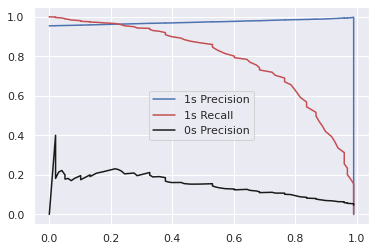

In [8]:

probs = worker.cur_model.predict_proba(worker.X_test)
print(probs)
thres = np.linspace(0,1,101)
precs_0 = []
precs_1 = []
recs_0 = []
recs_1 = []
for t in thres:
  predictions = probs[:,1] > t
  tp = sum((worker.y_test == 1) * predictions)
  fp = sum((worker.y_test == 0) * predictions)
  tn = sum((worker.y_test == 0) * (1-predictions))
  fn = sum((worker.y_test == 1) * (1-predictions))
  if t == 0 or t == 0.5 or t == 1:
    print(f"tp:{tp}\nfp:{fp}\ntn:{tn}\nfn:{fn}")
  precs_1.append(tp / (tp+fp+1))
  precs_0.append(tn / (tn+fn+1))
  recs_0.append(tn / (tn+fp+1))
  recs_1.append(tp / (tp+fn+1))
# precs_1, recs_1, thres_1 = precision_recall_curve(worker.y_test, probs[:,1], pos_label=1)
# precs_0, recs_0, thres_0 = precision_recall_curve(worker.y_test, probs[:,0], pos_label=0)
print(precs_1)
print(recs_1)
print(precs_0)
print(recs_0)
fig, ax = plt.subplots()
ax.plot(recs_0, precs_1, 'b', label="1s Precision")
ax.plot(recs_0, recs_1, 'r', label="1s Recall")
ax.plot(recs_0, precs_0, 'k', label="0s Precision")
ax.legend()
plt.show()

## Scratch

In [9]:
print(os.getcwd())

/content/drive/My Drive/Field Day/Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill/Colab


In [10]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [11]:
# worker2.classification_report()
# worker2.model_stats(graph=True)

In [12]:
# plot_confusion_matrix(worker2.cur_model, worker2.X_test, worker2.y_test, values_format='d')